# This is our workspace for data analysis!

In [14]:
# feel free to add more
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import statsmodels.api as sm
import queries
import importlib
importlib.reload(queries)

<module 'queries' from '/Users/abigailsiegel/Desktop/algos_final_project/queries.py'>

In [15]:
BODY_WORN_CAMERAS = 'Body-worn Cameras'
GUNSHOT_DETECTION = 'Gunshot Detection'
AUTOMATED_LICENSE_PLATE_READERS = 'Automated License Plate Readers'
PREDICTIVE_POLICING = 'Predictive Policing'
FACE_RECOGNITION = 'Face Recognition'
DRONES = 'Drone'
CAMERA_REGISTRY = 'Camera Registry'
CELL_SITE_SIMULATOR = 'Cell-site Simulator'
VIDEO_CV = 'Video Analytics/Computer Vision'
FUSION_CENTER = 'Fusion Center'
CRIME_CENTER = 'Real-Time Crime Center'
RING = 'Ring/Neighbors Partnership'

In [16]:
# Create connection to atlas
conn_atlas = sqlite3.connect('./atlas.db')
c_atlas = conn_atlas.cursor()

In [17]:
c_atlas.execute(queries.LIST_TABLES_CMD)
conn_atlas.commit()

# can switch to 2015 or 2017
c_atlas.execute(queries.LIST_COLUMNS_CMD_ATLAS)
conn_atlas.commit()

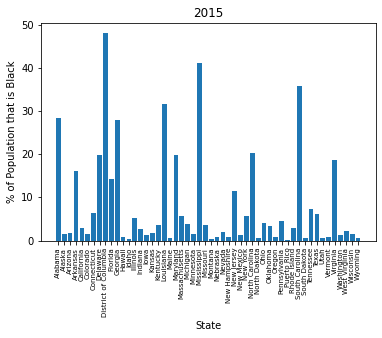

In [18]:
SELECT_POP_2015 = "SELECT State, AVG(Black) from acs2015_county_data GROUP BY State"
cursor_state = conn_atlas.cursor()
cursor_state.execute(SELECT_POP_2015)
pop_info_2015 = [a for a in cursor_state]

states = [a[0] for a in pop_info_2015]
pop = [a[1] for a in pop_info_2015]

plot_state_race = plt.bar(states, pop)
plt.title('2015')
plt.xlabel('State')
plt.ylabel('% of Population that is Black')
plt.xticks(fontsize=7, rotation=90)
plt.show()

# OLS workspace
- array with number of each race in a county (multiply percentage by total pop)
- array with total number of surveillance devices in a county (need SQL query for this)
    - SQL query to join 

In [19]:
# Feel free to change to demographic groups
cursor_2015_total_pop = conn_atlas.cursor()
cursor_2015_total_pop.execute(queries.SELECT_TOTAL_POP_2015)
total_pop_2015 = [float(a[0]) for a in cursor_2015_total_pop]

total_pop_black_2015 = []
for i in range(len(total_pop_2015)) :
    total_pop_black_2015.append(total_pop_2015[i] * black_2015[i]/100.0)

NameError: name 'black_2015' is not defined

In [7]:
# Examine all tech 
# JOIN_ALL_TECH = '''SELECT 
#                        acs2015_county_data.Black, 
#                        acs2015_county_data.TotalPop, 
#                        (Atlas_of_surveillance_20201007.State || \' \' || Atlas_of_Surveillance_20201007.County), 
#                        acs2015_county_data.Poverty 
#                 FROM 
#                        Atlas_of_Surveillance_20201007, 
#                        acs2015_county_data 
#                 WHERE 
#                        (acs2015_county_data.State || acs2015_county_data.County) = (Atlas_of_Surveillance_20201007.State || Atlas_of_Surveillance_20201007.County) 
#                 '''
# c_atlas = conn_atlas.cursor()
# c_atlas.execute(JOIN_ALL_TECH)
# conn_atlas.commit()

# # Examine individual tech 
c_atlas = conn_atlas.cursor()
c_atlas.execute(queries.DISTINCT_TECH)
conn_atlas.commit()

c_atlas = conn_atlas.cursor()
c_atlas.execute(queries.JOIN_QUERY, [FACE_RECOGNITION])
conn_atlas.commit()

# map of county -> number of technoloiges used in that county
cameras_per_county = collections.Counter([row[2] for row in c_atlas])

In [223]:
# x should be number of a demographic group per county
# y should be number of cameras found

# # Examine all tech
# c_atlas = conn_atlas.cursor()
# c_atlas.execute(JOIN_ALL_TECH)
# conn_atlas.commit()

# Examine individual tech
c_atlas = conn_atlas.cursor()
c_atlas.execute(queries.JOIN_QUERY, [RING])
conn_atlas.commit()

# map of county -> percentage of Black people in that county
pop_black = {}
total_population = {}
cameras_per_capita = {}
poverty_per_capita = {}
for row in c_atlas :
    percent_black, total_pop, county_state, poverty = row
    pop_black[county_state] = float(percent_black)
    total_population[county_state] = float(total_pop)
    cameras_per_capita[county_state] = float(cameras_per_county[county_state])
    poverty_per_capita[county_state] = float(poverty)
        
x = []
y = []
for county_state in cameras_per_capita:
    y.append(cameras_per_capita[county_state])
    x.append(pop_black[county_state]/100.0)
x, y = np.array(x), np.array(y)

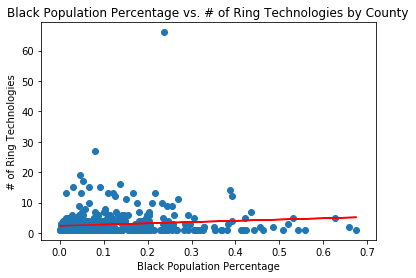

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     7.321
Date:                Fri, 23 Oct 2020   Prob (F-statistic):            0.00704
Time:                        11:01:50   Log-Likelihood:                -1460.0
No. Observations:                 520   AIC:                             2924.
Df Residuals:                     518   BIC:                             2932.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3364      0.236      9.918      0.0

In [224]:
# Plotting and analysis 
plt.scatter(x, y)
plt.title('Black Population Percentage vs. # of Ring Technologies by County')
plt.xlabel('Black Population Percentage')
plt.ylabel('# of Ring Technologies')

plt.plot(x, 4.13398611*x + 2.33643036, color='red')

plt.show()
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
params = results.params

print(results.summary())

0.5310077519379846
0.5271317829457365
0.5542635658914729
0.562015503875969
0.5581395348837209
0.562015503875969
0.5852713178294574
0.5775193798449613
0.5813953488372093
0.5852713178294574
0.5968992248062015
0.5775193798449613
0.5775193798449613
0.5852713178294574
0.5813953488372093
0.562015503875969
0.5736434108527132
0.5736434108527132
0.5697674418604651
0.562015503875969
0.5697674418604651
0.5658914728682171
0.5697674418604651
0.5697674418604651
0.5736434108527132
0.5697674418604651
0.5697674418604651
0.5697674418604651
0.5658914728682171
0.5503875968992248
0.5697674418604651
0.562015503875969
0.5697674418604651
0.5658914728682171
0.5542635658914729
0.562015503875969
0.5736434108527132
0.5736434108527132
0.5697674418604651
0.5736434108527132
0.5697674418604651
0.5736434108527132
0.5813953488372093
0.5736434108527132
0.5697674418604651
0.5852713178294574
0.5813953488372093
0.5775193798449613
0.5736434108527132
0.5775193798449613
0.5775193798449613
0.5736434108527132
0.5736434108527132

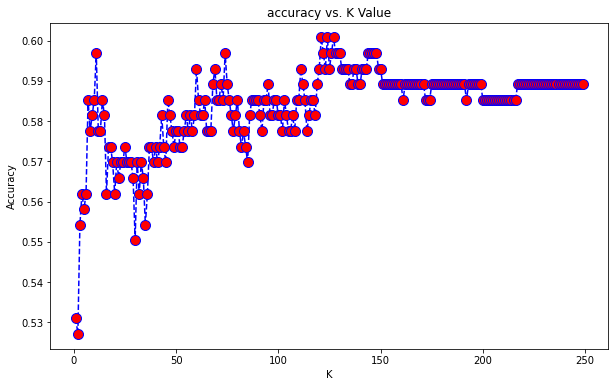

In [11]:
for county in cameras_per_county :
    num_cams = cameras_per_county[county]
    if num_cams <= a :
        cameras_per_county[county] = 0.0
    elif num_cams <= b :
        cameras_per_county[county] = 1.0
    elif num_cams <= c :
        cameras_per_county[county] = 2.0
    elif num_cams <= d :
        cameras_per_county[county] = 3.0
X = []

# labels
y = []
for county in cameras_per_county :
    X.append(features_map[county])
    y.append(cameras_per_county[county])

X = np.array(X)
y = np.array(y)
    
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

accuracies = []
for i in range(1, 250):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, pred_i)
    accuracies.append(acc)
    print(acc)
print(max(accuracies))

plt.figure(figsize=(10,6))
plt.plot(range(1,250),accuracies,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

print(len(set(y_test)))


In [10]:
c_atlas = conn_atlas.cursor()
c_atlas.execute(queries.ML_DATA_QUERY)
conn_atlas.commit()

# dictionary going from County_state -> numpy array of features for that county_state -> numpy 2d array
features_map = {}
cameras_per_county = collections.Counter([row[0] for row in c_atlas])
c_atlas = conn_atlas.cursor()
c_atlas.execute(queries.ML_DATA_QUERY)
conn_atlas.commit()
nums = []
for val in cameras_per_county.values() :
    nums.append(float(val))
a = np.percentile(np.array(nums), 25, axis=None, out=None)
b = np.percentile(np.array(nums), 50, axis=None, out=None)
c = np.percentile(np.array(nums), 75, axis=None, out=None)
d = np.percentile(np.array(nums), 100, axis=None, out=None)

for row in c_atlas :
    county = row[0]
    features_map[county] = np.asarray(row[1:len(row)], dtype=np.float32)

# KNN Workspace

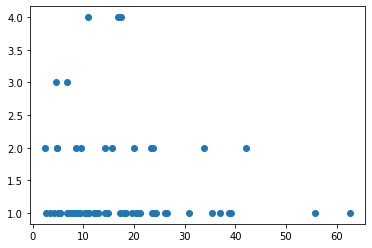

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7991
Date:                Fri, 23 Oct 2020   Prob (F-statistic):              0.375
Time:                        10:24:33   Log-Likelihood:                -71.494
No. Observations:                  62   AIC:                             147.0
Df Residuals:                      60   BIC:                             151.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5251      0.168      9.054      0.0

In [152]:
# x should be number of a demographic group per county
# y should be number of cameras found

# map of county -> number of cameras in that county
# cameras_per_county = collections.Counter([row[2] for row in c_atlas])

# map of county -> percentage of Black people in that county
pop_black = {}
cameras_per_capita = {}
c_atlas = conn_atlas.cursor()
c_atlas.execute(queries.JOIN_QUERY, [GUNSHOT_DETECTION])
conn_atlas.commit()
poverty_per_capita = {}
for row in c_atlas :
    percent_black, total_pop, county_state, poverty = row
    pop_black[county_state] = float(percent_black)
    cameras_per_capita[county_state] = float(cameras_per_county[county_state]) # / float(total_pop)
    poverty_per_capita[county_state] = float(poverty)
x = []
y = []
for county_state in cameras_per_capita :
    y.append(cameras_per_capita[county_state])
    x.append(pop_black[county_state])
x, y = np.array(x), np.array(y)
plt.scatter(x, y)
plt.show()
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

['Virginia Shenandoah County', 'Illinois Peoria County', 'North Carolina Wayne County', 'New York Monroe County', 'Pennsylvania Allegheny County', 'New York Orange County', 'Oregon Tillamook County', 'North Carolina Martin County', 'Georgia Fayette County', 'New Mexico Luna County', 'Colorado Eagle County', 'Texas Taylor County', 'Florida Marion County', 'North Dakota Grand Forks County', 'Colorado Broomfield County', 'New Mexico Santa Fe County', 'Texas Jefferson County', 'New York Westchester County', 'Alabama Madison County', 'North Carolina Pitt County', 'Texas Lubbock County', 'Ohio Stark County', 'Pennsylvania Lehigh County', 'Texas Burnet County', 'Ohio Lucas County', 'Indiana Lake County', 'Kentucky Warren County', 'Florida Miami-Dade County', 'Florida Miami-Dade County', 'West Virginia Harrison County', 'Arizona Navajo County', 'Texas Nueces County', 'Texas Bell County', 'Illinois Cook County', 'Pennsylvania Allegheny County', 'Arizona La Paz County', 'Ohio Lorain County', 'No